In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
from scipy.stats import boxcox
import nltk
from transformers import pipeline
from tqdm.auto import tqdm
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder

In [2]:
dfa_jan1 = pd.read_csv("/kaggle/input/nyt-comments/ArticlesJan2017.csv")
dfa_jan2 = pd.read_csv("/kaggle/input/nyt-comments/ArticlesJan2018.csv")
dfa_feb1 = pd.read_csv("/kaggle/input/nyt-comments/ArticlesFeb2017.csv")
dfa_feb2 = pd.read_csv("/kaggle/input/nyt-comments/ArticlesFeb2018.csv")
dfa_mar1 = pd.read_csv("/kaggle/input/nyt-comments/ArticlesMarch2017.csv")
dfa_mar2 = pd.read_csv("/kaggle/input/nyt-comments/ArticlesMarch2018.csv")
dfa_apr1 = pd.read_csv("/kaggle/input/nyt-comments/ArticlesApril2017.csv")
dfa_apr2 = pd.read_csv("/kaggle/input/nyt-comments/ArticlesApril2018.csv")
dfa_may1 = pd.read_csv("/kaggle/input/nyt-comments/ArticlesMay2017.csv")

dfc_jan1 = pd.read_csv("/kaggle/input/nyt-comments/CommentsJan2017.csv")
dfc_jan2 = pd.read_csv("/kaggle/input/nyt-comments/CommentsJan2018.csv")
dfc_feb1 = pd.read_csv("/kaggle/input/nyt-comments/CommentsFeb2017.csv")
dfc_feb2 = pd.read_csv("/kaggle/input/nyt-comments/CommentsFeb2018.csv")
dfc_mar1 = pd.read_csv("/kaggle/input/nyt-comments/CommentsMarch2017.csv")
dfc_mar2 = pd.read_csv("/kaggle/input/nyt-comments/CommentsMarch2018.csv")
dfc_apr1 = pd.read_csv("/kaggle/input/nyt-comments/CommentsApril2017.csv")
dfc_apr2 = pd.read_csv("/kaggle/input/nyt-comments/CommentsApril2018.csv")
dfc_may1 = pd.read_csv("/kaggle/input/nyt-comments/CommentsMay2017.csv")

/tmp/ipykernel_36/1978054138.py:11: DtypeWarning: Columns (14,15,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  dfc_jan1 = pd.read_csv("/kaggle/input/nyt-comments/CommentsJan2017.csv")
/tmp/ipykernel_36/1978054138.py:12: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  dfc_jan2 = pd.read_csv("/kaggle/input/nyt-comments/CommentsJan2018.csv")
/tmp/ipykernel_36/1978054138.py:13: DtypeWarning: Columns (14,15,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  dfc_feb1 = pd.read_csv("/kaggle/input/nyt-comments/CommentsFeb2017.csv")
/tmp/ipykernel_36/1978054138.py:14: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  dfc_feb2 = pd.read_csv("/kaggle/input/nyt-comments/CommentsFeb2018.csv")
/tmp/ipykernel_36/1978054138.py:15: DtypeWarning: Columns (32,33) have mixed types. Specify dtype option on import or set low_memory=F

In [3]:
dfa_jan1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   articleID         850 non-null    object
 1   abstract          40 non-null     object
 2   byline            850 non-null    object
 3   documentType      850 non-null    object
 4   headline          850 non-null    object
 5   keywords          850 non-null    object
 6   multimedia        850 non-null    int64 
 7   newDesk           850 non-null    object
 8   printPage         850 non-null    int64 
 9   pubDate           850 non-null    object
 10  sectionName       850 non-null    object
 11  snippet           850 non-null    object
 12  source            850 non-null    object
 13  typeOfMaterial    850 non-null    object
 14  webURL            850 non-null    object
 15  articleWordCount  850 non-null    int64 
dtypes: int64(3), object(13)
memory usage: 106.4+ KB


In [4]:
dfc_jan1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231449 entries, 0 to 231448
Data columns (total 34 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   approveDate            231449 non-null  int64  
 1   articleID              231449 non-null  object 
 2   articleWordCount       231449 non-null  int64  
 3   commentBody            231449 non-null  object 
 4   commentID              231449 non-null  float64
 5   commentSequence        231449 non-null  float64
 6   commentTitle           218042 non-null  object 
 7   commentType            231449 non-null  object 
 8   createDate             231449 non-null  int64  
 9   depth                  231449 non-null  float64
 10  editorsSelection       231449 non-null  int64  
 11  inReplyTo              231449 non-null  int64  
 12  newDesk                231449 non-null  object 
 13  parentID               231449 non-null  float64
 14  parentUserDisplayName  56226 non-nul

In [5]:
df_jan1 = dfa_jan1.merge(dfc_jan1, on = ['articleID', 'newDesk', 'printPage', 'sectionName', 'typeOfMaterial', 'articleWordCount'], how = 'inner')
df_jan2 = dfa_jan2.merge(dfc_jan2, on = ['articleID', 'newDesk', 'printPage', 'sectionName', 'typeOfMaterial', 'articleWordCount'], how = 'inner')
df_feb1 = dfa_feb1.merge(dfc_feb1, on = ['articleID', 'newDesk', 'printPage', 'sectionName', 'typeOfMaterial', 'articleWordCount'], how = 'inner')
df_feb2 = dfa_feb2.merge(dfc_feb2, on = ['articleID', 'newDesk', 'printPage', 'sectionName', 'typeOfMaterial', 'articleWordCount'], how = 'inner')
df_mar1 = dfa_mar1.merge(dfc_mar1, on = ['articleID', 'newDesk', 'printPage', 'sectionName', 'typeOfMaterial', 'articleWordCount'], how = 'inner')
df_mar2 = dfa_mar2.merge(dfc_mar2, on = ['articleID', 'newDesk', 'printPage', 'sectionName', 'typeOfMaterial', 'articleWordCount'], how = 'inner')
df_apr1 = dfa_apr1.merge(dfc_apr1, on = ['articleID', 'newDesk', 'printPage', 'sectionName', 'typeOfMaterial', 'articleWordCount'], how = 'inner')
df_apr2 = dfa_apr2.merge(dfc_apr2, on = ['articleID', 'newDesk', 'printPage', 'sectionName', 'typeOfMaterial', 'articleWordCount'], how = 'inner')
df_may1 = dfa_may1.merge(dfc_may1, on = ['articleID', 'newDesk', 'printPage', 'sectionName', 'typeOfMaterial', 'articleWordCount'], how = 'inner')

In [6]:
df_jan1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231449 entries, 0 to 231448
Data columns (total 44 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   articleID              231449 non-null  object 
 1   abstract               4474 non-null    object 
 2   byline                 231449 non-null  object 
 3   documentType           231449 non-null  object 
 4   headline               231449 non-null  object 
 5   keywords               231449 non-null  object 
 6   multimedia             231449 non-null  int64  
 7   newDesk                231449 non-null  object 
 8   printPage              231449 non-null  int64  
 9   pubDate                231449 non-null  object 
 10  sectionName            231449 non-null  object 
 11  snippet                231449 non-null  object 
 12  source                 231449 non-null  object 
 13  typeOfMaterial         231449 non-null  object 
 14  webURL                 231449 non-nu

In [7]:
datalist = [df_jan1, df_jan2, df_feb1, df_feb2, df_mar1, df_mar2, df_apr1, df_apr2, df_may1]

In [8]:
df = pd.concat(datalist, ignore_index = True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991146 entries, 0 to 1991145
Data columns (total 44 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   articleID              object 
 1   abstract               object 
 2   byline                 object 
 3   documentType           object 
 4   headline               object 
 5   keywords               object 
 6   multimedia             int64  
 7   newDesk                object 
 8   printPage              int64  
 9   pubDate                object 
 10  sectionName            object 
 11  snippet                object 
 12  source                 object 
 13  typeOfMaterial         object 
 14  webURL                 object 
 15  articleWordCount       int64  
 16  approveDate            int64  
 17  commentBody            object 
 18  commentID              float64
 19  commentSequence        float64
 20  commentTitle           object 
 21  commentType            object 
 22  createDate        

In [10]:
#df.to_csv("nyt_merged.csv", index = False)

In [11]:
df.isnull().sum()

articleID                      0
abstract                 1980529
byline                         0
documentType                   0
headline                       0
keywords                       0
multimedia                     0
newDesk                        0
printPage                      0
pubDate                        0
sectionName                    0
snippet                        0
source                         0
typeOfMaterial                 0
webURL                         0
articleWordCount               0
approveDate                    0
commentBody                    1
commentID                      0
commentSequence                0
commentTitle               76721
commentType                    0
createDate                     0
depth                          0
editorsSelection               0
inReplyTo                      0
parentID                       0
parentUserDisplayName    1453931
permID                        20
picURL                         0
recommenda

In [12]:
df.drop(['abstract', 'parentUserDisplayName', 'recommendedFlag', 'reportAbuseFlag', 'userTitle', 'userURL'], axis = 1, inplace = True)

In [13]:
df.dropna(inplace = True)

In [14]:
df.isnull().sum()

articleID           0
byline              0
documentType        0
headline            0
keywords            0
multimedia          0
newDesk             0
printPage           0
pubDate             0
sectionName         0
snippet             0
source              0
typeOfMaterial      0
webURL              0
articleWordCount    0
approveDate         0
commentBody         0
commentID           0
commentSequence     0
commentTitle        0
commentType         0
createDate          0
depth               0
editorsSelection    0
inReplyTo           0
parentID            0
permID              0
picURL              0
recommendations     0
replyCount          0
sharing             0
status              0
timespeople         0
trusted             0
updateDate          0
userDisplayName     0
userID              0
userLocation        0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1913734 entries, 0 to 1991145
Data columns (total 38 columns):
 #   Column            Dtype  
---  ------            -----  
 0   articleID         object 
 1   byline            object 
 2   documentType      object 
 3   headline          object 
 4   keywords          object 
 5   multimedia        int64  
 6   newDesk           object 
 7   printPage         int64  
 8   pubDate           object 
 9   sectionName       object 
 10  snippet           object 
 11  source            object 
 12  typeOfMaterial    object 
 13  webURL            object 
 14  articleWordCount  int64  
 15  approveDate       int64  
 16  commentBody       object 
 17  commentID         float64
 18  commentSequence   float64
 19  commentTitle      object 
 20  commentType       object 
 21  createDate        float64
 22  depth             float64
 23  editorsSelection  int64  
 24  inReplyTo         float64
 25  parentID          float64
 26  permID            o

In [16]:
df['createDate'] = pd.to_datetime(df['createDate'], unit='s')

In [17]:
df['year'] = df['createDate'].dt.year
df['month'] = df['createDate'].dt.month
df['day'] = df['createDate'].dt.day
df['hour'] = df['createDate'].dt.hour
df['dayofweek'] = df['createDate'].dt.dayofweek

df['is_weekend'] = df['dayofweek'].isin([5, 6])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1913734 entries, 0 to 1991145
Data columns (total 44 columns):
 #   Column            Dtype         
---  ------            -----         
 0   articleID         object        
 1   byline            object        
 2   documentType      object        
 3   headline          object        
 4   keywords          object        
 5   multimedia        int64         
 6   newDesk           object        
 7   printPage         int64         
 8   pubDate           object        
 9   sectionName       object        
 10  snippet           object        
 11  source            object        
 12  typeOfMaterial    object        
 13  webURL            object        
 14  articleWordCount  int64         
 15  approveDate       int64         
 16  commentBody       object        
 17  commentID         float64       
 18  commentSequence   float64       
 19  commentTitle      object        
 20  commentType       object        
 21  createDate   

In [19]:
df['depth'] = df['depth'].astype(np.int32)

In [20]:
df['replyCount'].unique()

array([   0.,    1.,    2.,    3.,    6.,    4.,    7.,    5.,    8.,
         26.,   10.,   12.,    9.,   11.,   13.,   36.,   24.,   20.,
         56.,   15.,   14.,   17.,   16.,   23.,   25.,   21.,   40.,
         51.,   33.,   28.,   32.,   27.,   39.,   18.,   19.,   50.,
         46.,   43.,   86.,   29.,   58.,   22.,   45.,   38.,   68.,
         55.,   90.,   65.,   30.,   48.,   54.,   35.,  155.,   63.,
         47.,   59.,  277.,   34.,   37.,   31.,  101.,   53.,  148.,
         57.,   42.,  121.,  117.,   77.,   73.,   79.,  113.,   84.,
        190.,   74.,   41.,   64.,   44.,  157.,  203.,   61.,   52.,
         83.,  186.,  138.,   82.,  239.,   70.,  227.,  461.,   92.,
        529.,   76.,   67.,   49.,   66.,  107.,  417.,  111.,   60.,
         99.,  179.,  199.,   87.,   97.,  110.,   96.,   98.,  145.,
         95.,   88.,   71.,  168.,   72.,   89.,  116.,  196.,   94.,
        122.,   91.,  147.,  142.,  106.,  150.,  187.,  129.,  238.,
        161.,  120.,

In [21]:
df = df[df['replyCount'] >= 0]

In [22]:
df =  df.drop(columns = ['source' , 'webURL', 'commentSequence' , 'approveDate' , 'createDate' , 'permID' , 'picURL' , 'status' , 'userDisplayName' , 'updateDate' , 'userLocation'], axis = 1)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1913721 entries, 0 to 1991145
Data columns (total 33 columns):
 #   Column            Dtype  
---  ------            -----  
 0   articleID         object 
 1   byline            object 
 2   documentType      object 
 3   headline          object 
 4   keywords          object 
 5   multimedia        int64  
 6   newDesk           object 
 7   printPage         int64  
 8   pubDate           object 
 9   sectionName       object 
 10  snippet           object 
 11  typeOfMaterial    object 
 12  articleWordCount  int64  
 13  commentBody       object 
 14  commentID         float64
 15  commentTitle      object 
 16  commentType       object 
 17  depth             int32  
 18  editorsSelection  int64  
 19  inReplyTo         float64
 20  parentID          float64
 21  recommendations   float64
 22  replyCount        float64
 23  sharing           int64  
 24  timespeople       float64
 25  trusted           float64
 26  userID            f

In [24]:
df['pubDate'] = pd.to_datetime(df['pubDate'])   
df['Publish_Day'] = df['pubDate'].dt.day  
df['Publish_Month'] = df['pubDate'].dt.month
df['Publish_Year'] = df['pubDate'].dt.year
df['Publish_Dayofweek'] = df['pubDate'].dt.dayofweek
df['Publish_IsWeekend'] = df['Publish_Dayofweek'].isin([5,6])


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1913721 entries, 0 to 1991145
Data columns (total 38 columns):
 #   Column             Dtype         
---  ------             -----         
 0   articleID          object        
 1   byline             object        
 2   documentType       object        
 3   headline           object        
 4   keywords           object        
 5   multimedia         int64         
 6   newDesk            object        
 7   printPage          int64         
 8   pubDate            datetime64[ns]
 9   sectionName        object        
 10  snippet            object        
 11  typeOfMaterial     object        
 12  articleWordCount   int64         
 13  commentBody        object        
 14  commentID          float64       
 15  commentTitle       object        
 16  commentType        object        
 17  depth              int32         
 18  editorsSelection   int64         
 19  inReplyTo          float64       
 20  parentID           float64   

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


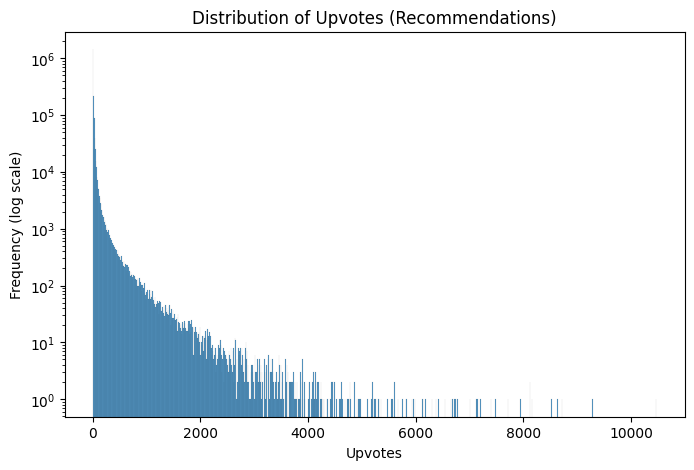

In [26]:
plt.figure(figsize=(8,5))
sns.histplot(df['recommendations'], bins=1000, log_scale=(False, True))  # log y-axis since it's skewed
plt.title("Distribution of Upvotes (Recommendations)")
plt.xlabel("Upvotes")
plt.ylabel("Frequency (log scale)")
plt.show()

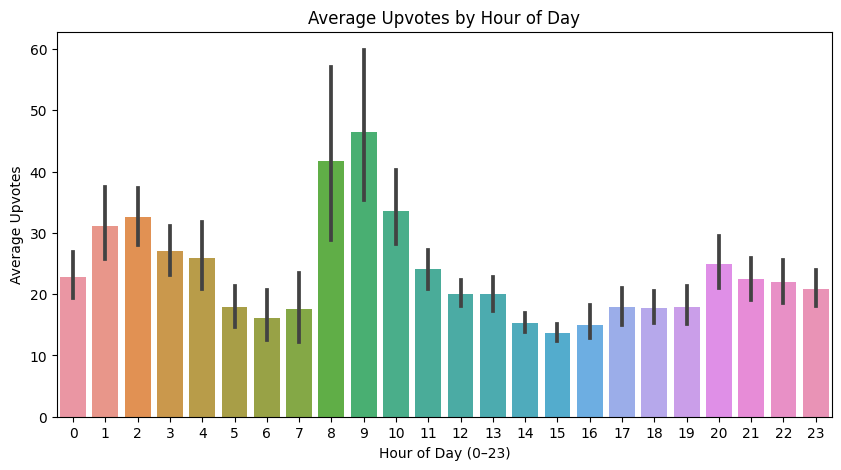

In [27]:
plt.figure(figsize=(10,5))
sns.barplot(
    x="hour", 
    y="recommendations", 
    data=df.sample(100000, random_state=42)  # sample for speed
)
plt.title("Average Upvotes by Hour of Day")
plt.xlabel("Hour of Day (0–23)")
plt.ylabel("Average Upvotes")
plt.show()

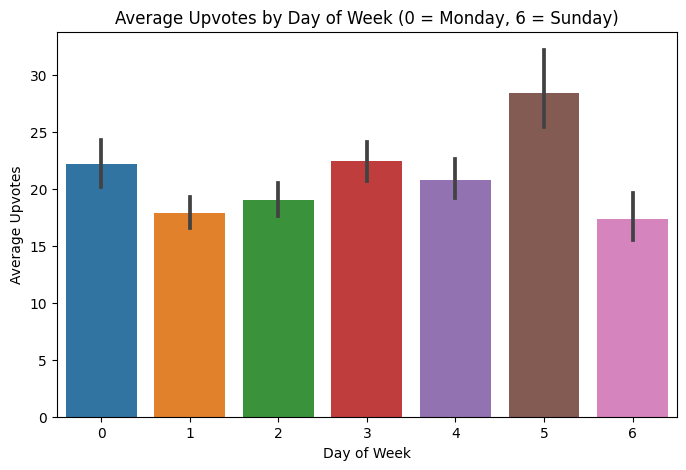

In [28]:
plt.figure(figsize=(8,5))
sns.barplot(
    x="dayofweek", 
    y="recommendations", 
    data=df.sample(100000, random_state=42)
)
plt.title("Average Upvotes by Day of Week (0 = Monday, 6 = Sunday)")
plt.xlabel("Day of Week")
plt.ylabel("Average Upvotes")
plt.show()

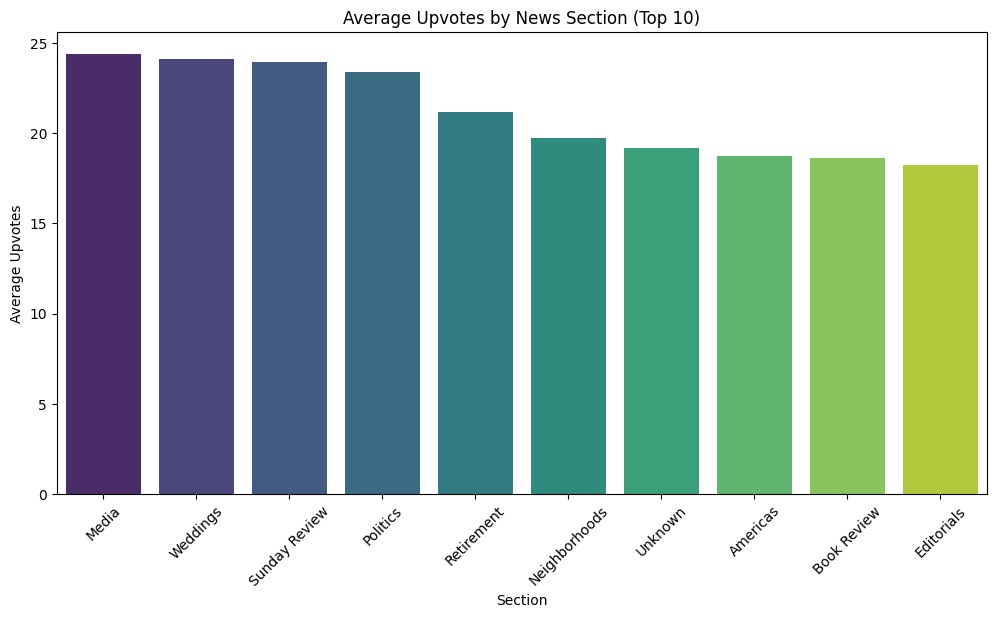

In [29]:
plt.figure(figsize=(12,6))

section_avg = (
    df.groupby("sectionName")["recommendations"]
      .mean()
      .sort_values(ascending=False)
      .head(10)
)

sns.barplot(
    x=section_avg.index,
    y=section_avg.values,
    palette="viridis"
)

plt.xticks(rotation=45)
plt.title("Average Upvotes by News Section (Top 10)")
plt.xlabel("Section")
plt.ylabel("Average Upvotes")
plt.show()

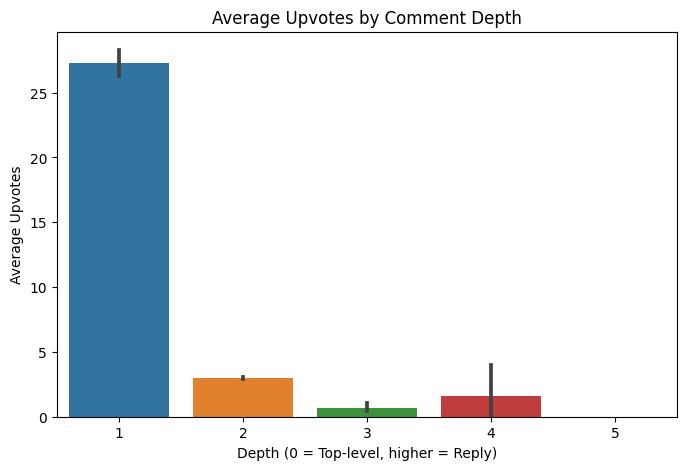

In [30]:
plt.figure(figsize=(8,5))
sns.barplot(
    x="depth", 
    y="recommendations", 
    data=df.sample(100000, random_state=42)
)

plt.title("Average Upvotes by Comment Depth")
plt.xlabel("Depth (0 = Top-level, higher = Reply)")
plt.ylabel("Average Upvotes")
plt.show()

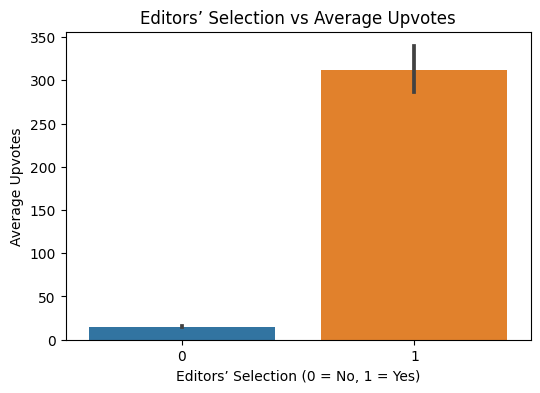

In [31]:
plt.figure(figsize=(6,4))
sns.barplot(
    x="editorsSelection", 
    y="recommendations", 
    data=df.sample(100000, random_state=42)
)
plt.title("Editors’ Selection vs Average Upvotes")
plt.xlabel("Editors’ Selection (0 = No, 1 = Yes)")
plt.ylabel("Average Upvotes")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


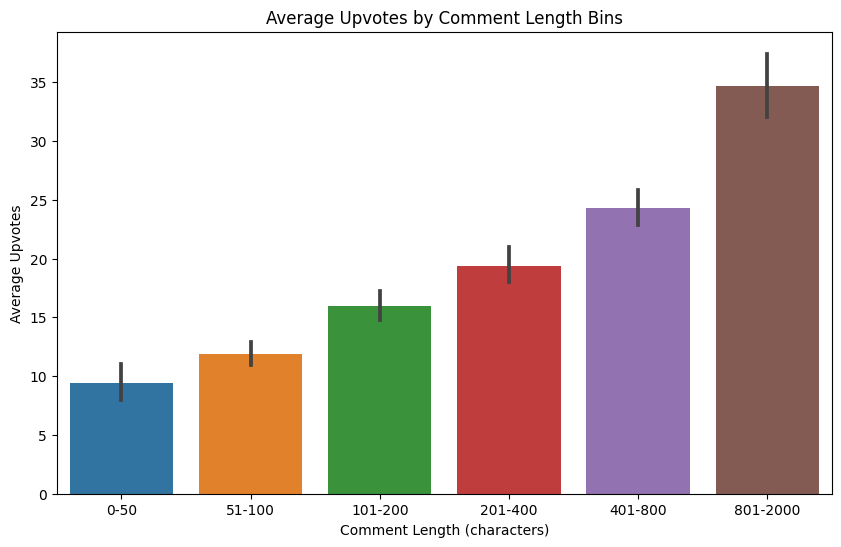

In [32]:
df_sample = df.sample(100000, random_state=42)

df_sample["comment_length"] = df_sample["commentBody"].fillna("").apply(len)

bins = [0, 50, 100, 200, 400, 800, 2000]
labels = ["0-50", "51-100", "101-200", "201-400", "401-800", "801-2000"]

df_sample["length_bin"] = pd.cut(df_sample["comment_length"], bins=bins, labels=labels, include_lowest=True)

plt.figure(figsize=(10,6))
sns.barplot(
    x="length_bin", 
    y="recommendations", 
    data=df_sample,
    order=labels
)

plt.title("Average Upvotes by Comment Length Bins")
plt.xlabel("Comment Length (characters)")
plt.ylabel("Average Upvotes")
plt.show()

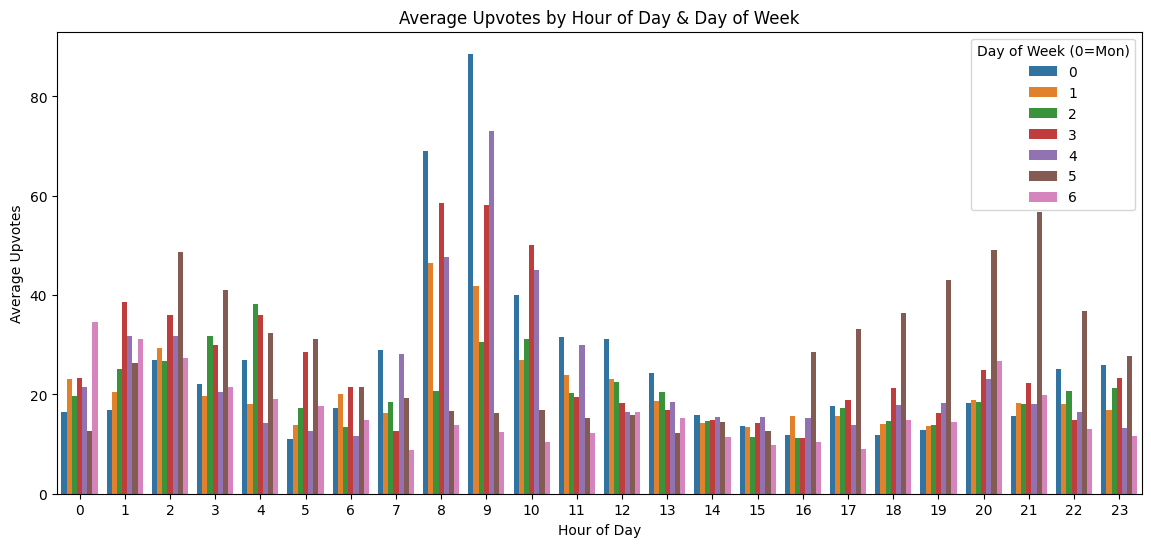

In [33]:
df_sample = df.sample(200000, random_state=42)

avg_upvotes = (
    df_sample.groupby(["dayofweek", "hour"])["recommendations"]
    .mean()
    .reset_index()
)

plt.figure(figsize=(14,6))
sns.barplot(
    x="hour", 
    y="recommendations", 
    hue="dayofweek", 
    data=avg_upvotes,
    palette="tab10"
)

plt.title("Average Upvotes by Hour of Day & Day of Week")
plt.xlabel("Hour of Day")
plt.ylabel("Average Upvotes")
plt.legend(title="Day of Week (0=Mon)")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


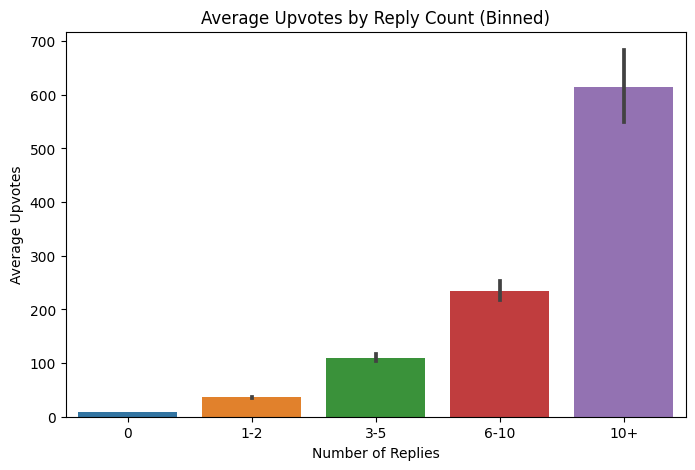

In [34]:
df_sample = df.sample(200000, random_state=42)

bins = [-1, 0, 2, 5, 10, 1000]  
labels = ["0", "1-2", "3-5", "6-10", "10+"]

df_sample["reply_bin"] = pd.cut(df_sample["replyCount"].fillna(0), bins=bins, labels=labels)

plt.figure(figsize=(8,5))
sns.barplot(
    x="reply_bin", 
    y="recommendations", 
    data=df_sample,
    order=labels
)

plt.title("Average Upvotes by Reply Count (Binned)")
plt.xlabel("Number of Replies")
plt.ylabel("Average Upvotes")
plt.show()

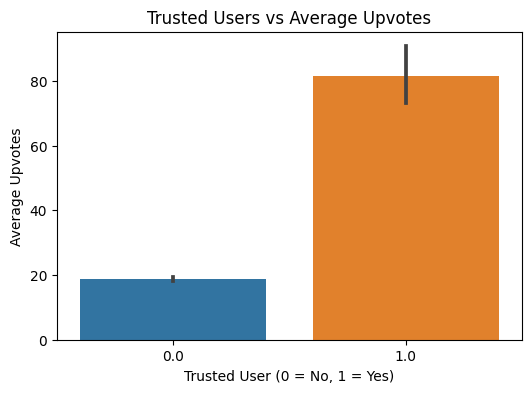

In [35]:
plt.figure(figsize=(6,4))
sns.barplot(
    x="trusted", 
    y="recommendations", 
    data=df.sample(100000, random_state=42)
)
plt.title("Trusted Users vs Average Upvotes")
plt.xlabel("Trusted User (0 = No, 1 = Yes)")
plt.ylabel("Average Upvotes")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


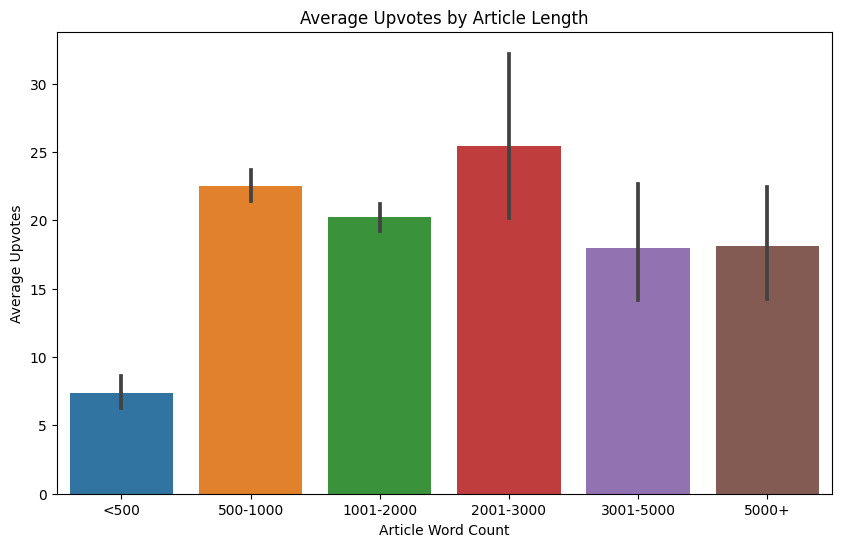

In [36]:
df_sample = df.sample(100000, random_state=42)
bins = [0, 500, 1000, 2000, 3000, 5000, 10000]
labels = ["<500", "500-1000", "1001-2000", "2001-3000", "3001-5000", "5000+"]

df_sample["article_length_bin"] = pd.cut(df_sample["articleWordCount"], bins=bins, labels=labels, include_lowest=True)

plt.figure(figsize=(10,6))
sns.barplot(
    x="article_length_bin", 
    y="recommendations", 
    data=df_sample,
    order=labels
)
plt.title("Average Upvotes by Article Length")
plt.xlabel("Article Word Count")
plt.ylabel("Average Upvotes")
plt.show()

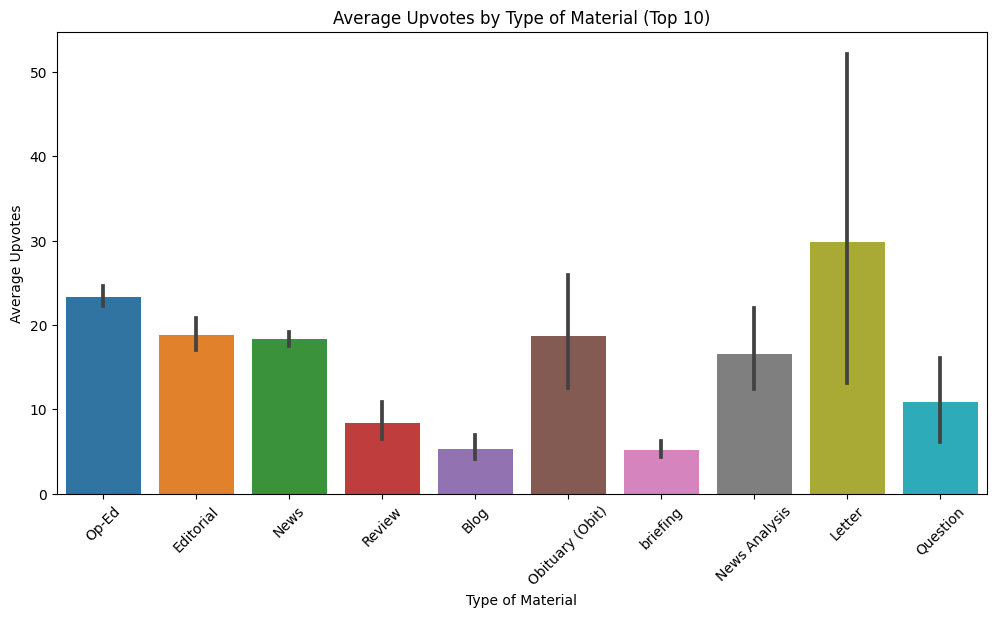

In [37]:
plt.figure(figsize=(12,6))
top_types = df['typeOfMaterial'].value_counts().index[:10]
sns.barplot(
    x="typeOfMaterial", 
    y="recommendations", 
    data=df[df['typeOfMaterial'].isin(top_types)].sample(100000, random_state=42)
)
plt.xticks(rotation=45)
plt.title("Average Upvotes by Type of Material (Top 10)")
plt.xlabel("Type of Material")
plt.ylabel("Average Upvotes")
plt.show()

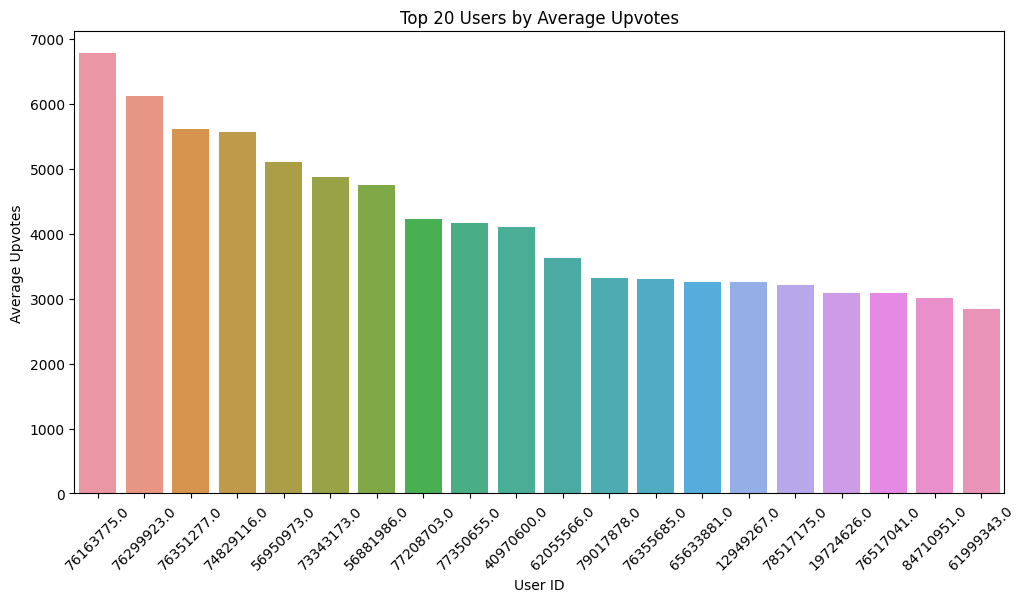

In [38]:
top_users = (
    df.groupby("userID")["recommendations"]
      .mean()
      .sort_values(ascending=False)
      .head(20)
)

plt.figure(figsize=(12,6))
sns.barplot(x=top_users.index.astype(str), y=top_users.values)
plt.xticks(rotation=45)
plt.title("Top 20 Users by Average Upvotes")
plt.xlabel("User ID")
plt.ylabel("Average Upvotes")
plt.show()

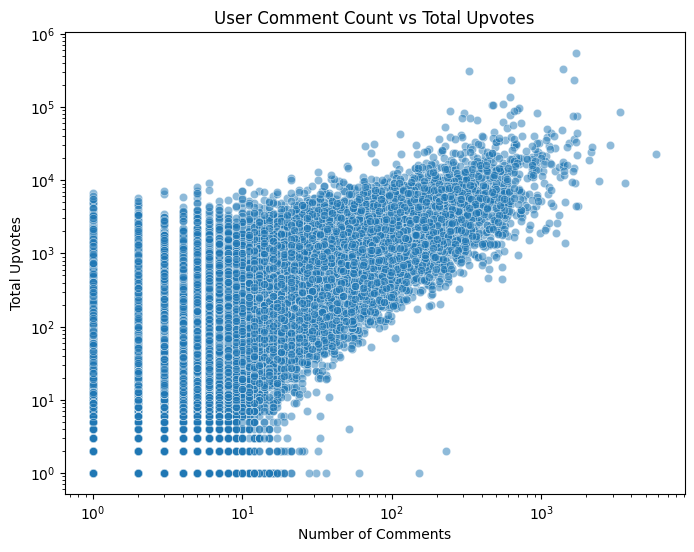

In [39]:
user_stats = df.groupby("userID").agg(
    total_upvotes=("recommendations", "sum"),
    comment_count=("commentID", "count")
).reset_index()

plt.figure(figsize=(8,6))
sns.scatterplot(
    x="comment_count", 
    y="total_upvotes", 
    data=user_stats, 
    alpha=0.5
)
plt.xscale("log")
plt.yscale("log")
plt.title("User Comment Count vs Total Upvotes")
plt.xlabel("Number of Comments")
plt.ylabel("Total Upvotes")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


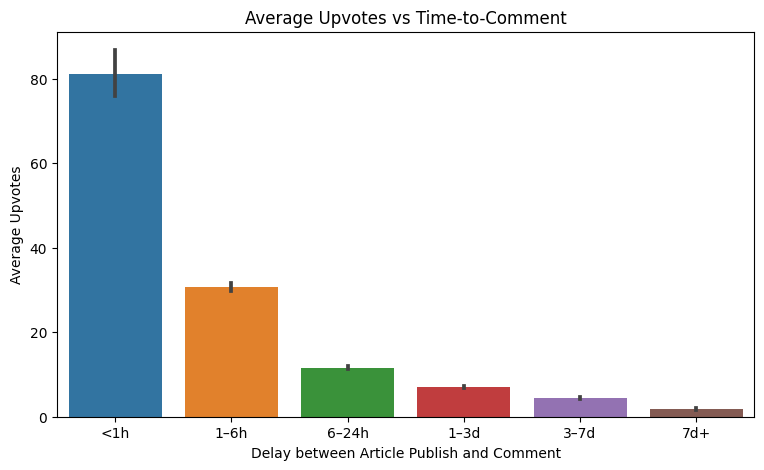

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


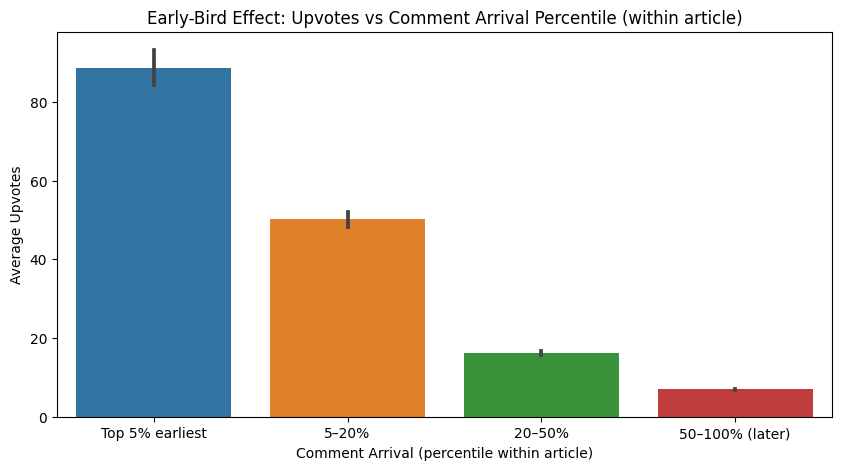

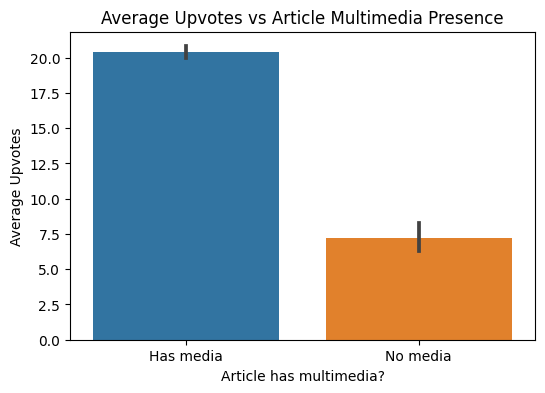

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


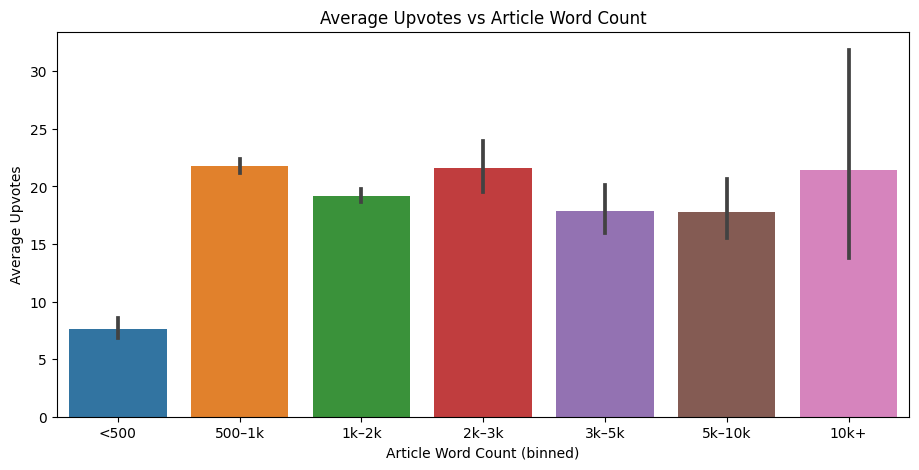

In [40]:
def build_comment_ts(df):
    # hour may have NaNs; set to 0 safely
    hrs = df["hour"].fillna(0).astype(int)
    return pd.to_datetime(
        dict(year=df["year"].astype(int),
             month=df["month"].astype(int),
             day=df["day"].astype(int),
             hour=hrs),
        errors="coerce"
    )

df_tt = df[["pubDate","year","month","day","hour","recommendations"]].copy()
df_tt["comment_ts"] = build_comment_ts(df_tt)

df_tt = df_tt.dropna(subset=["pubDate","comment_ts"])

delay_hours = (df_tt["comment_ts"] - df_tt["pubDate"]).dt.total_seconds() / 3600.0
df_tt["delay_hours"] = delay_hours

df_tt = df_tt[df_tt["delay_hours"] >= 0]

delay_bins = [-0.001, 1, 6, 24, 72, 168, np.inf]
delay_labels = ["<1h","1–6h","6–24h","1–3d","3–7d","7d+"]

df_tt["delay_bin"] = pd.cut(df_tt["delay_hours"], bins=delay_bins, labels=delay_labels)

plt.figure(figsize=(9,5))
sns.barplot(x="delay_bin", y="recommendations", data=df_tt.sample(min(300000, len(df_tt)), random_state=42), order=delay_labels)
plt.title("Average Upvotes vs Time-to-Comment")
plt.xlabel("Delay between Article Publish and Comment")
plt.ylabel("Average Upvotes")
plt.show()

need_cols = ["articleID","pubDate","year","month","day","hour","recommendations"]
df_rank = df[need_cols].dropna(subset=["articleID"]).copy()
df_rank["comment_ts"] = build_comment_ts(df_rank)

df_rank = df_rank.dropna(subset=["comment_ts","pubDate"])

df_rank = df_rank.sort_values(["articleID","comment_ts"])
grp = df_rank.groupby("articleID", observed=True)

df_rank["position"] = grp.cumcount() + 1
sizes = grp["recommendations"].transform("size")
df_rank["pos_pct"] = df_rank["position"] / sizes

pct_bins = [0, 0.05, 0.20, 0.50, 1.00]
pct_labels = ["Top 5% earliest","5–20%","20–50%","50–100% (later)"]
df_rank["arrival_bin"] = pd.cut(df_rank["pos_pct"], bins=pct_bins, labels=pct_labels, include_lowest=True)

plt.figure(figsize=(10,5))
sns.barplot(x="arrival_bin", y="recommendations", data=df_rank.sample(min(300000, len(df_rank)), random_state=43), order=pct_labels)
plt.title("Early-Bird Effect: Upvotes vs Comment Arrival Percentile (within article)")
plt.xlabel("Comment Arrival (percentile within article)")
plt.ylabel("Average Upvotes")
plt.show()

df_mm = df[["multimedia","recommendations"]].copy()
df_mm["has_media"] = (df_mm["multimedia"].fillna(0) > 0).map({False:"No media", True:"Has media"})

plt.figure(figsize=(6,4))
sns.barplot(x="has_media", y="recommendations", data=df_mm.sample(min(300000, len(df_mm)), random_state=44))
plt.title("Average Upvotes vs Article Multimedia Presence")
plt.xlabel("Article has multimedia?")
plt.ylabel("Average Upvotes")
plt.show()

df_depth = df[["depth","recommendations"]].copy()
df_depth["level"] = np.where(df_depth["depth"].fillna(0).astype(int) == 0, "Top-level", "Reply")

df_len = df[["articleWordCount","recommendations"]].copy()
bins = [0, 500, 1000, 2000, 3000, 5000, 10000, np.inf]
labels = ["<500","500–1k","1k–2k","2k–3k","3k–5k","5k–10k","10k+"]

df_len["article_len_bin"] = pd.cut(df_len["articleWordCount"].fillna(0), bins=bins, labels=labels, include_lowest=True)

plt.figure(figsize=(11,5))
sns.barplot(x="article_len_bin", y="recommendations", data=df_len.sample(min(300000, len(df_len)), random_state=46), order=labels)
plt.title("Average Upvotes vs Article Word Count")
plt.xlabel("Article Word Count (binned)")
plt.ylabel("Average Upvotes")
plt.show()

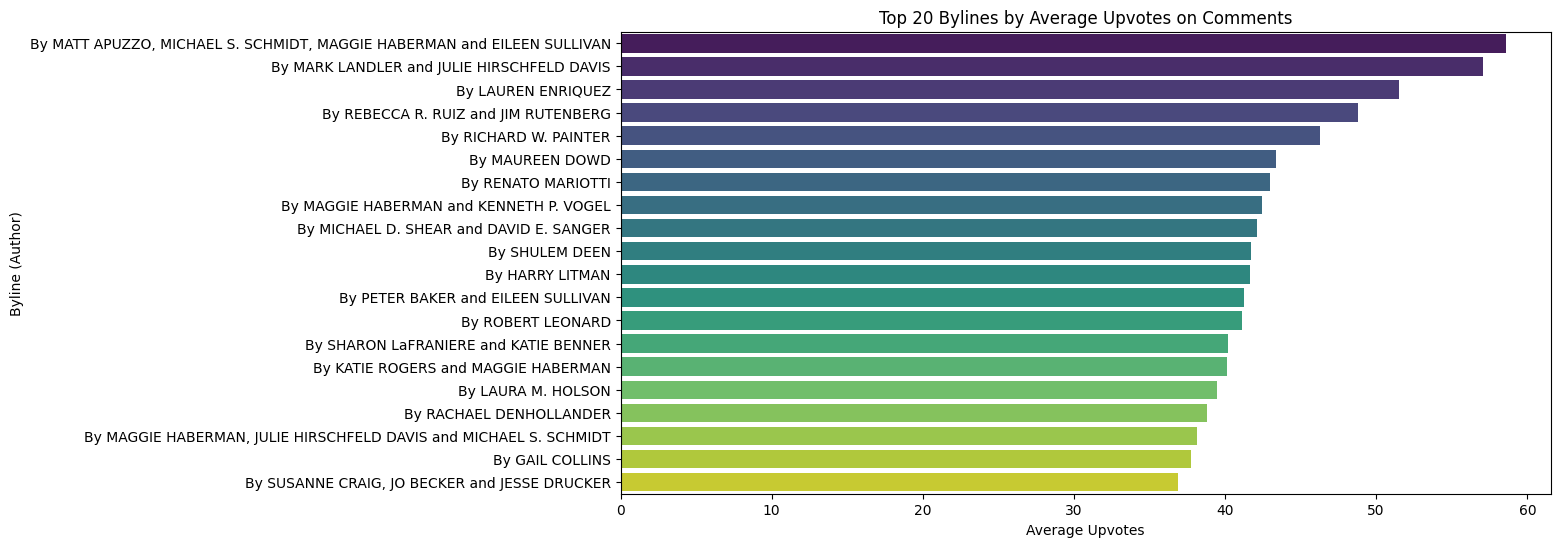

In [41]:
byline_stats = (
    df.groupby("byline")
      .agg(avg_upvotes=("recommendations","mean"),
           n_comments=("commentID","count"))
      .reset_index()
      .dropna(subset=["byline"])
)

byline_stats = byline_stats[byline_stats["n_comments"] >= 500]

top_bylines = byline_stats.sort_values("avg_upvotes", ascending=False).head(20)

plt.figure(figsize=(12,6))
sns.barplot(x="avg_upvotes", y="byline", data=top_bylines, palette="viridis")

plt.title("Top 20 Bylines by Average Upvotes on Comments")
plt.xlabel("Average Upvotes")
plt.ylabel("Byline (Author)")
plt.show()

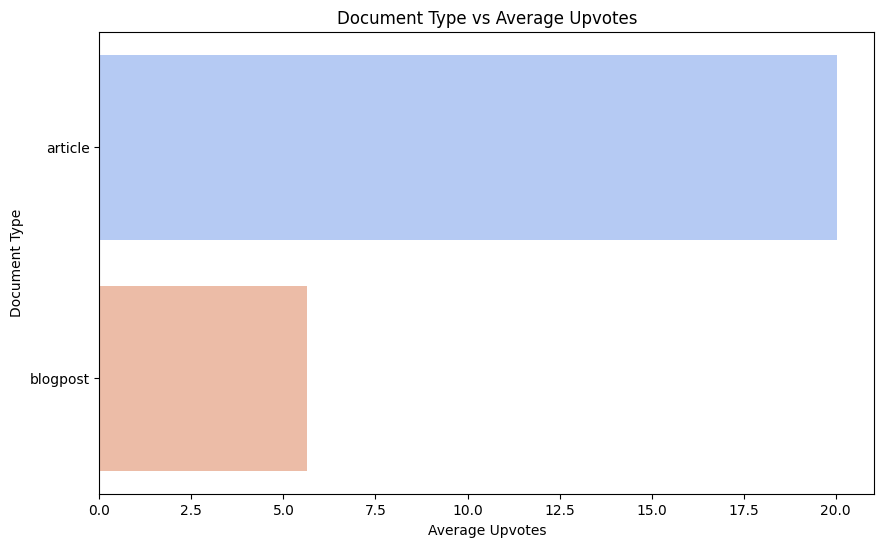

In [42]:
doc_stats = (
    df.groupby("documentType")
      .agg(avg_upvotes=("recommendations","mean"),
           n_comments=("commentID","count"))
      .reset_index()
      .dropna(subset=["documentType"])
)

doc_stats = doc_stats[doc_stats["n_comments"] >= 500]

doc_stats = doc_stats.sort_values("avg_upvotes", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x="avg_upvotes", y="documentType", data=doc_stats, palette="coolwarm")

plt.title("Document Type vs Average Upvotes")
plt.xlabel("Average Upvotes")
plt.ylabel("Document Type")
plt.show()

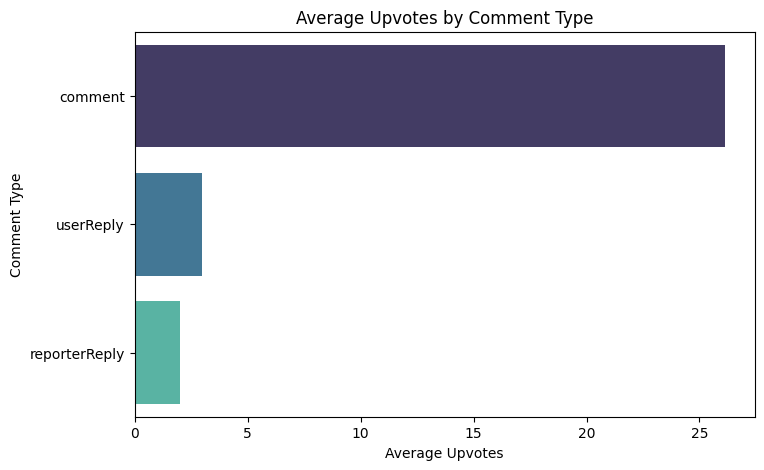

In [43]:
comment_type_stats = (
    df.groupby("commentType")["recommendations"]
      .mean()
      .reset_index()
      .dropna()
      .sort_values("recommendations", ascending=False)
)

plt.figure(figsize=(8,5))
sns.barplot(x="recommendations", y="commentType", data=comment_type_stats, palette="mako")

plt.title("Average Upvotes by Comment Type")
plt.xlabel("Average Upvotes")
plt.ylabel("Comment Type")
plt.show()

/tmp/ipykernel_36/296283782.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("reply_bin")["recommendations"]
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


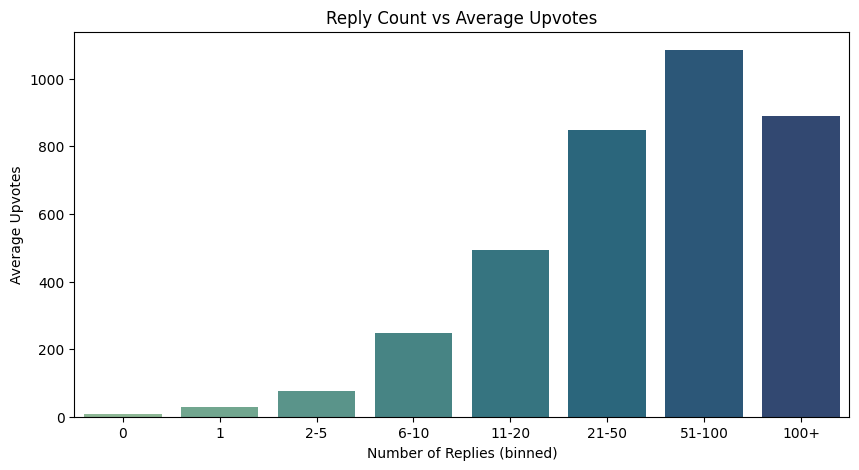

In [44]:
df["reply_bin"] = pd.cut(
    df["replyCount"],
    bins=[-1, 0, 1, 5, 10, 20, 50, 100, df["replyCount"].max()],
    labels=["0", "1", "2-5", "6-10", "11-20", "21-50", "51-100", "100+"]
)

reply_stats = (
    df.groupby("reply_bin")["recommendations"]
      .mean()
      .reset_index()
      .dropna()
)

plt.figure(figsize=(10,5))
sns.barplot(x="reply_bin", y="recommendations", data=reply_stats, palette="crest")

plt.title("Reply Count vs Average Upvotes")
plt.xlabel("Number of Replies (binned)")
plt.ylabel("Average Upvotes")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

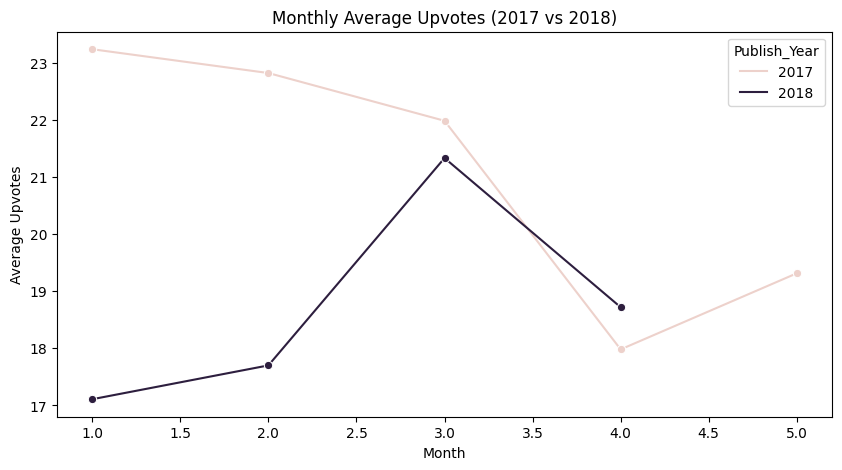

In [45]:
monthly_upvotes = (
    df.groupby(["Publish_Year", "Publish_Month"])["recommendations"]
      .mean()
      .reset_index()
)

monthly_upvotes = monthly_upvotes[
    ((monthly_upvotes["Publish_Year"] == 2017) & (monthly_upvotes["Publish_Month"].between(1,5))) |
    ((monthly_upvotes["Publish_Year"] == 2018) & (monthly_upvotes["Publish_Month"].between(1,4)))
]

plt.figure(figsize=(10,5))
sns.lineplot(
    data=monthly_upvotes, 
    x="Publish_Month", 
    y="recommendations", 
    hue="Publish_Year", 
    marker="o"
)
plt.title("Monthly Average Upvotes (2017 vs 2018)")
plt.xlabel("Month")
plt.ylabel("Average Upvotes")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

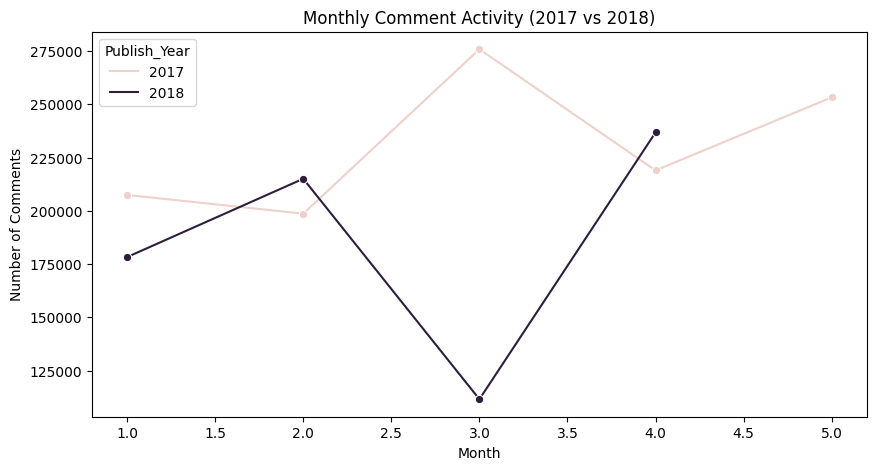

In [46]:
monthly_activity = (
    df.groupby(["Publish_Year", "Publish_Month"])["commentID"]
      .count()
      .reset_index()
      .rename(columns={"commentID": "num_comments"})
)

monthly_activity = monthly_activity[
    ((monthly_activity["Publish_Year"] == 2017) & (monthly_activity["Publish_Month"].between(1,5))) |
    ((monthly_activity["Publish_Year"] == 2018) & (monthly_activity["Publish_Month"].between(1,4)))
]

plt.figure(figsize=(10,5))
sns.lineplot(
    data=monthly_activity, 
    x="Publish_Month", 
    y="num_comments", 
    hue="Publish_Year", 
    marker="o"
)
plt.title("Monthly Comment Activity (2017 vs 2018)")
plt.xlabel("Month")
plt.ylabel("Number of Comments")
plt.show()

In [47]:
rename_dict = {
   
    "articleID": "a_id",
    "byline": "a_byline",
    "documentType": "a_doc_type",
    "headline": "a_headline",
    "keywords": "a_keywords",
    "multimedia": "a_multimedia_count",
    "newDesk": "a_news_desk",
    "printPage": "a_print_page",
    "pubDate": "a_pub_date",
    "sectionName": "a_section",
    "snippet": "a_snippet",
    "typeOfMaterial": "a_material_type",
    "articleWordCount": "a_word_count",

    "commentBody": "c_body",
    "commentID": "c_id",
    "commentTitle": "c_title",
    "commentType": "c_type",
    "depth": "c_depth",
    "editorsSelection": "c_editors_selection",
    "inReplyTo": "c_in_reply_to",
    "parentID": "c_parent_id",

    "recommendations": "upvotes",   
    "replyCount": "c_reply_count",
    "sharing": "c_sharing",
    "timespeople": "c_timespeople",
    "trusted": "c_trusted",
    "userID": "u_id",

    "year": "c_year",
    "month": "c_month",
    "day": "c_day",
    "hour": "c_hour",
    "dayofweek": "c_dayofweek",
    "is_weekend": "c_is_weekend",

    "Publish_Day": "a_pub_day",
    "Publish_Month": "a_pub_month",
    "Publish_Year": "a_pub_year",
    "Publish_Dayofweek": "a_pub_dayofweek",
    "Publish_IsWeekend": "a_pub_is_weekend",

    "reply_bin": "c_reply_bin"
}

df = df.rename(columns=rename_dict)

print("Columns after renaming:\n")
print(df.columns)

Columns after renaming:

Index(['a_id', 'a_byline', 'a_doc_type', 'a_headline', 'a_keywords',
       'a_multimedia_count', 'a_news_desk', 'a_print_page', 'a_pub_date',
       'a_section', 'a_snippet', 'a_material_type', 'a_word_count', 'c_body',
       'c_id', 'c_title', 'c_type', 'c_depth', 'c_editors_selection',
       'c_in_reply_to', 'c_parent_id', 'upvotes', 'c_reply_count', 'c_sharing',
       'c_timespeople', 'c_trusted', 'u_id', 'c_year', 'c_month', 'c_day',
       'c_hour', 'c_dayofweek', 'c_is_weekend', 'a_pub_day', 'a_pub_month',
       'a_pub_year', 'a_pub_dayofweek', 'a_pub_is_weekend', 'c_reply_bin'],
      dtype='object')


In [48]:
ordered_cols = [

    "a_id", "a_headline", "a_byline", "a_doc_type", "a_section",
    "a_keywords", "a_material_type", "a_snippet",
    "a_multimedia_count", "a_news_desk", "a_print_page",
    "a_word_count", "a_pub_date",
    "a_pub_year", "a_pub_month", "a_pub_day",
    "a_pub_dayofweek", "a_pub_is_weekend",
    

    "c_id", "c_body", "c_title", "c_type",
    "c_depth", "c_editors_selection", "c_in_reply_to", "c_parent_id",
    "c_reply_count", "c_sharing", "c_timespeople", "c_trusted",
    "c_year", "c_month", "c_day", "c_hour",
    "c_dayofweek", "c_is_weekend", "c_reply_bin",
    
    "u_id",
    
    "upvotes"
]

df = df[ordered_cols]

print("Final structure:")
print(df.columns.tolist())

Final structure:
['a_id', 'a_headline', 'a_byline', 'a_doc_type', 'a_section', 'a_keywords', 'a_material_type', 'a_snippet', 'a_multimedia_count', 'a_news_desk', 'a_print_page', 'a_word_count', 'a_pub_date', 'a_pub_year', 'a_pub_month', 'a_pub_day', 'a_pub_dayofweek', 'a_pub_is_weekend', 'c_id', 'c_body', 'c_title', 'c_type', 'c_depth', 'c_editors_selection', 'c_in_reply_to', 'c_parent_id', 'c_reply_count', 'c_sharing', 'c_timespeople', 'c_trusted', 'c_year', 'c_month', 'c_day', 'c_hour', 'c_dayofweek', 'c_is_weekend', 'c_reply_bin', 'u_id', 'upvotes']


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1913721 entries, 0 to 1991145
Data columns (total 39 columns):
 #   Column               Dtype         
---  ------               -----         
 0   a_id                 object        
 1   a_headline           object        
 2   a_byline             object        
 3   a_doc_type           object        
 4   a_section            object        
 5   a_keywords           object        
 6   a_material_type      object        
 7   a_snippet            object        
 8   a_multimedia_count   int64         
 9   a_news_desk          object        
 10  a_print_page         int64         
 11  a_word_count         int64         
 12  a_pub_date           datetime64[ns]
 13  a_pub_year           int32         
 14  a_pub_month          int32         
 15  a_pub_day            int32         
 16  a_pub_dayofweek      int32         
 17  a_pub_is_weekend     bool          
 18  c_id                 float64       
 19  c_body               objec

In [50]:
df['y_log'] = np.log1p(df['upvotes'])

print("Original Upvotes:")
print(df['upvotes'].describe())

print("\nLog-transformed Target (y_log):")
print(df['y_log'].describe())

Original Upvotes:
count    1.913721e+06
mean     1.998067e+01
std      1.068318e+02
min      0.000000e+00
25%      1.000000e+00
50%      4.000000e+00
75%      1.000000e+01
max      1.047200e+04
Name: upvotes, dtype: float64

Log-transformed Target (y_log):
count    1.913721e+06
mean     1.676265e+00
std      1.326479e+00
min      0.000000e+00
25%      6.931472e-01
50%      1.609438e+00
75%      2.397895e+00
max      9.256556e+00
Name: y_log, dtype: float64


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


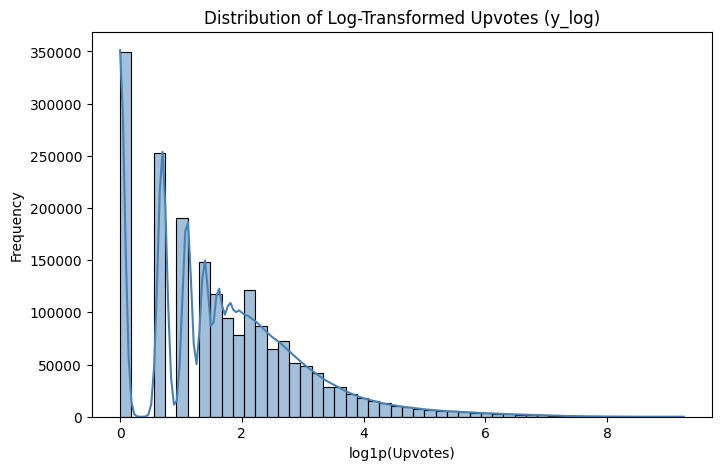

In [51]:
plt.figure(figsize=(8,5))
sns.histplot(df['y_log'], bins=50, kde=True, color="steelblue")
plt.title("Distribution of Log-Transformed Upvotes (y_log)")
plt.xlabel("log1p(Upvotes)")
plt.ylabel("Frequency")
plt.show()

Optimal λ (lambda) for Box-Cox: -0.24308219801090747


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


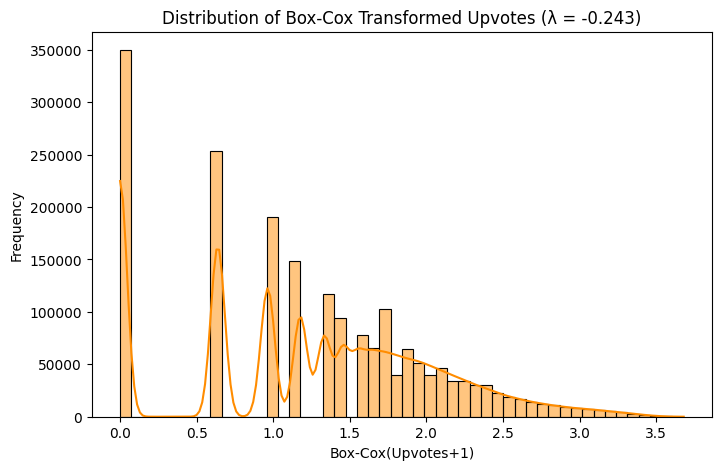

In [52]:
y_boxcox, lam = boxcox(df['upvotes'] + 1)

df['y_boxcox'] = y_boxcox

print("Optimal λ (lambda) for Box-Cox:", lam)

plt.figure(figsize=(8,5))
sns.histplot(df['y_boxcox'], bins=50, kde=True, color="darkorange")
plt.title(f"Distribution of Box-Cox Transformed Upvotes (λ = {lam:.3f})")
plt.xlabel("Box-Cox(Upvotes+1)")
plt.ylabel("Frequency")
plt.show()

In [53]:
df.columns

Index(['a_id', 'a_headline', 'a_byline', 'a_doc_type', 'a_section',
       'a_keywords', 'a_material_type', 'a_snippet', 'a_multimedia_count',
       'a_news_desk', 'a_print_page', 'a_word_count', 'a_pub_date',
       'a_pub_year', 'a_pub_month', 'a_pub_day', 'a_pub_dayofweek',
       'a_pub_is_weekend', 'c_id', 'c_body', 'c_title', 'c_type', 'c_depth',
       'c_editors_selection', 'c_in_reply_to', 'c_parent_id', 'c_reply_count',
       'c_sharing', 'c_timespeople', 'c_trusted', 'c_year', 'c_month', 'c_day',
       'c_hour', 'c_dayofweek', 'c_is_weekend', 'c_reply_bin', 'u_id',
       'upvotes', 'y_log', 'y_boxcox'],
      dtype='object')

In [54]:
df.drop(columns = ["a_pub_date","a_doc_type" , "c_reply_bin"], axis =1 , inplace = True)

In [55]:
df["a_byline"].unique()

array(['By JENNIFER STEINHAUER', 'By MARK LANDLER', 'By CAITLIN LOVINGER',
       ..., 'By BRIAN GATENS', 'By BARBARA BOLTON',
       'By HIROKO TABUCHI and HENRY FOUNTAIN'], dtype=object)

In [56]:
by_starts = df['a_byline'].str.strip().str.lower().str.startswith('by')

print(by_starts.value_counts())

print(df.loc[~by_starts, 'a_byline'].sample(50))

a_byline
True     1908052
False       5669
Name: count, dtype: int64
1919276                                    FRANK BRUNI
1622122                           Text by ILIANA MAGRA
1129080                                     LINDY WEST
1578815    Reported by C. J. HUGHES and SUZANNE HAMLIN
1919271                                    FRANK BRUNI
1563916                                CHARLES M. BLOW
393978                       Compiled by LARA TAKENAGA
1563798                                CHARLES M. BLOW
1563736                                CHARLES M. BLOW
135127                                     FRANK BRUNI
1563769                                CHARLES M. BLOW
72117                       Interview by ANA MARIE COX
1563813                                CHARLES M. BLOW
72164                       Interview by ANA MARIE COX
570354              Introduction by BINYAMIN APPELBAUM
72121                       Interview by ANA MARIE COX
1214609                           Text by ILIANA MA

In [57]:
def extract_authors_simple(name):
    if pd.isnull(name):
        return ''
    name = name.strip()
    parts = re.split(r'\bby\b', name, flags=re.IGNORECASE)
    
    authors = []
    for part in parts[1:]: 
        cleaned = re.sub(r'\b(text|photographs|compiled|introduction|interview)\b', '', part, flags=re.IGNORECASE)
        sub_authors = [a.strip() for a in re.split(r'\band\b', cleaned, flags=re.IGNORECASE) if a.strip()]
        authors.extend(sub_authors)
    
    return ' and '.join(authors)

df['a_byline'] = df['a_byline'].apply(extract_authors_simple)

print((df['a_byline']).sample(70))

1681567    DAVID E. SANGER and CHOE SANG-HUN
831872                         MELISSA CLARK
562060                    DHRUV KHULLAR, M.D
916150                               UNKNOWN
272279           MATTHEW HAAG and MARC TRACY
                         ...                
521114                   JENNIFER STEINHAUER
1831745                        BRET STEPHENS
761883                       CHARLES M. BLOW
1871124                     HANYA YANAGIHARA
858454                   THE EDITORIAL BOARD
Name: a_byline, Length: 70, dtype: object


In [58]:
df["c_body"].unique()

array(['For all you Americans out there --- still rejoicing over the majority win of  Republicans over the Legislature of this land.<br/>Beware.<br/>Just like you would have been, if  there were any other kind of majority.<br/>The Founding Fathers had something like this in mind wheh they formed our Great Nation.<br/>It\'s part of the natural \'Checks &amp; Balances\' system that keeps this country on an even keel.<br/>But this is now being threatened -- with the majority of Executive, Legislative and Judidical power all in the hands of one political party.<br/>See to it that you remember our U.S. Constitution, and our Bill of Rights.<br/>Remember that "We", are still "the People".<br/>America belongs to all of us.<br/>And God help us all.',
       'Obamas policies may prove to be the least of this countrys worries.  The GOP has been emboldened to actually cut the OCE in the night before the new president or congress is sworn in following in their leaders footsteps.  Everyone is crying

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1913721 entries, 0 to 1991145
Data columns (total 38 columns):
 #   Column               Dtype  
---  ------               -----  
 0   a_id                 object 
 1   a_headline           object 
 2   a_byline             object 
 3   a_section            object 
 4   a_keywords           object 
 5   a_material_type      object 
 6   a_snippet            object 
 7   a_multimedia_count   int64  
 8   a_news_desk          object 
 9   a_print_page         int64  
 10  a_word_count         int64  
 11  a_pub_year           int32  
 12  a_pub_month          int32  
 13  a_pub_day            int32  
 14  a_pub_dayofweek      int32  
 15  a_pub_is_weekend     bool   
 16  c_id                 float64
 17  c_body               object 
 18  c_title              object 
 19  c_type               object 
 20  c_depth              int32  
 21  c_editors_selection  int64  
 22  c_in_reply_to        float64
 23  c_parent_id          float64
 24  c_r

In [60]:
df['a_section'].unique()

array(['Politics', 'Asia Pacific', 'Unknown', 'Pro Basketball',
       'Television', 'Baseball', 'Europe', 'Mind', 'Move', 'Family',
       'Media', 'Soccer', 'Sunday Review', 'Americas', 'Pro Football',
       'College Football', 'Live', 'Eat', 'Lesson Plans', 'Economy',
       'Room For Debate', 'Tennis', 'Book Review', 'DealBook',
       'Middle East', 'Africa', 'Canada', 'College Basketball',
       'Education Life', 'The Daily', 'Editorials', 'Art & Design',
       'Energy & Environment ', 'Music', 'Wine, Beer & Cocktails',
       'Olympics', 'Personal Tech', 'Fashion & Beauty', 'Dance', 'Hockey',
       'Golf', 'Retirement', "401(k)'s and Similar Plans",
       'Entrepreneurship', 'Entertainment', 'Opinion | Politics',
       'Weddings', 'Real Estate', 'Australia', 'Neighborhoods', 'Rugby',
       'Paying for College', 'Insider Events', 'Automobiles', 'Food',
       'Art', 'Opinion | The World', 'Student Loans', 'Auto Racing',
       'Cycling', 'Learning', 'Cricket'], dtype=objec

In [61]:
df['a_news_desk'].unique()

array(['National', 'Foreign', 'Games', 'OpEd', 'Metro', 'Sports',
       'Culture', 'Editorial', 'Science', 'Upshot', 'Learning', 'Unknown',
       'Magazine', 'Business', 'SundayBusiness', 'RealEstate', 'Well',
       'Dining', 'Styles', 'Insider', 'Weekend', 'BookReview', 'Travel',
       'Metropolitan', 'Politics', 'EdLife', 'Letters', 'Podcasts',
       'Washington', 'Smarter Living', 'Climate', 'NewsDesk', 'Obits',
       'Arts&Leisure', 'Express', 'Video', 'TStyle', 'SpecialSections',
       'Photo', 'Investigative', 'Society', 'Summary', 'NYTNow',
       'Automobiles'], dtype=object)

In [63]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [64]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    if pd.isna(text):
        return ""
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)  # remove URLs
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)           # remove punctuation
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])
    return text

text_columns = ['a_headline', 'a_snippet', 'a_keywords', 'c_title', 'c_body']
for col in text_columns:
    df[col+'_clean'] = df[col].apply(clean_text)

In [65]:
df["c_type"].nunique()

3

In [66]:
embed_cols = ['a_byline', 'a_section', 'a_material_type']
for col in embed_cols:
    df[col+'_cat'] = df[col].astype('category').cat.codes

c_type_le = LabelEncoder()
df['c_type_encoded'] = c_type_le.fit_transform(df['c_type'])


newsdesk_le = LabelEncoder()
df['a_news_desk_encoded'] = newsdesk_le.fit_transform(df['a_news_desk'])

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1913721 entries, 0 to 1991145
Data columns (total 48 columns):
 #   Column               Dtype  
---  ------               -----  
 0   a_id                 object 
 1   a_headline           object 
 2   a_byline             object 
 3   a_section            object 
 4   a_keywords           object 
 5   a_material_type      object 
 6   a_snippet            object 
 7   a_multimedia_count   int64  
 8   a_news_desk          object 
 9   a_print_page         int64  
 10  a_word_count         int64  
 11  a_pub_year           int32  
 12  a_pub_month          int32  
 13  a_pub_day            int32  
 14  a_pub_dayofweek      int32  
 15  a_pub_is_weekend     bool   
 16  c_id                 float64
 17  c_body               object 
 18  c_title              object 
 19  c_type               object 
 20  c_depth              int32  
 21  c_editors_selection  int64  
 22  c_in_reply_to        float64
 23  c_parent_id          float64
 24  c_r

In [68]:
df['a_byline'].nunique()

2680

In [69]:
sentiment_model = pipeline(
    "sentiment-analysis",
    model="cardiffnlp/twitter-roberta-base-sentiment-latest",
    device=0  
)

text_cols = ['a_headline', 'a_snippet', 'a_keywords', 'c_title', 'c_body']

def get_sentiment_scores(texts, batch_size=64):
    
    texts = [t if isinstance(t, str) else "" for t in texts]  # ensure strings
    results = []
    for i in tqdm(range(0, len(texts), batch_size), desc="Sentiment batches"):
        batch = [t[:512] for t in texts[i:i+batch_size]]  # truncate to 512 chars
        out = sentiment_model(batch)
        results.extend(out)

    scores = []
    for r in results:
        label = r['label'].lower()
        score = r['score']
        if 'positive' in label:
            scores.append(score)
        elif 'neutral' in label:
            scores.append(0.0)
        else:
            scores.append(-score)
    return np.array(scores)

2025-09-23 20:23:03.369351: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1758658983.712606      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1758658983.804876      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/501M [00:00<?, ?B/s]

Device set to use cuda:0


In [70]:
articles = df[['a_id','a_headline','a_snippet','a_keywords']].drop_duplicates('a_id')

for col in ['a_headline','a_snippet','a_keywords']:
    print(f"Processing unique {col}")
    articles[col+'_sentiment'] = get_sentiment_scores(articles[col].fillna("").tolist(), batch_size=64)

Processing unique a_headline


Sentiment batches:   0%|          | 0/131 [00:00<?, ?it/s]

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


Processing unique a_snippet


Sentiment batches:   0%|          | 0/131 [00:00<?, ?it/s]

Processing unique a_keywords


Sentiment batches:   0%|          | 0/131 [00:00<?, ?it/s]

In [71]:
df = df.merge(articles[['a_id','a_headline_sentiment','a_snippet_sentiment','a_keywords_sentiment']],
              on='a_id', how='left')

In [72]:
col = 'c_title' 
print(f"\nProcessing column: {col}")
sentiment_scores = get_sentiment_scores(df[col].fillna("").tolist(), batch_size=64)

temp = pd.DataFrame({
    'row_id': df.index,
    col + '_sentiment': sentiment_scores
})
temp.to_parquet(f'{col}_sentiment.parquet', index=False)


Processing column: c_title


Sentiment batches:   0%|          | 0/29902 [00:00<?, ?it/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=10000.0 (msgs/sec)
NotebookApp.rate_limit_window=1.0 (secs)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=10000.0 (msgs/sec)
NotebookApp.rate_limit_window=1.0 (secs)



In [73]:
col = 'c_body'  
print(f"\nProcessing column: {col}")
sentiment_scores = get_sentiment_scores(df[col].fillna("").tolist(), batch_size=64)

temp = pd.DataFrame({
    'row_id': df.index,
    col + '_sentiment': sentiment_scores
})
temp.to_parquet(f'{col}_sentiment.parquet', index=False)


Processing column: c_body


Sentiment batches:   0%|          | 0/29902 [00:00<?, ?it/s]

RuntimeError: The expanded size of the tensor (558) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 558].  Tensor sizes: [1, 514]

In [ ]:
df_new = df.copy()
for col in ['c_title','c_body']:
    temp = pd.read_parquet(f'{col}_sentiment.parquet')
    df_new = df_new.merge(temp, on='row_id', how='left')